In [1]:
# Created by Emille Ishida on 02/09/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from copy import deepcopy

### For extragalactic

In [2]:
data = pd.read_parquet('/media3/CRP8/TDE/data/xmatch/extragalactic/')

In [3]:
data.shape

(3734, 15)

In [10]:
np.unique(data['finkclass'].values)

array(['AGN', 'AGN_Candidate', 'BClG', 'BLLac', 'BSG*_Candidate',
       'BlueSG', 'BlueSG*', 'BlueSG_Candidate', 'Candidate_BSG*',
       'Candidate_RRLyr', 'Candidate_RSG*', 'Cepheid', 'Cl*',
       'ClassicalCep', 'Cluster*', 'Compact_Gr_G', 'EB*', 'EclBin', 'Em*',
       'EmG', 'FIR', 'GinCl', 'GinGroup', 'GinPair', 'GlCl', 'GlCl?',
       'GlCl?_Candidate', 'GlobCluster', 'GlobCluster_Candidate',
       'GroupG', 'HII', 'HII_G', 'IG', 'LINER', 'LMXB', 'LP*_Candidate',
       'LPV*', 'MIR', 'Microlensing candidate', 'Mira', 'Nova', 'OpCl',
       'PN?_Candidate', 'PairG', 'PartofG', 'Pec*', 'PulsV*', 'QSO',
       'RRLyr', 'RRLyrae', 'RSG*_Candidate', 'Radio', 'RedSG', 'RedSG*',
       'RedSG_Candidate', 'SNR', 'Seyfert2', 'Seyfert_1', 'Seyfert_2',
       'Solar System MPC', 'Star', 'StarburstG', 'Type2Cep', 'UV',
       'Unknown', 'V*', 'WR*', 'X', 'XB', 'YellowSG*', 'deltaCep'],
      dtype=object)

In [4]:
data_obj = data.groupby('objectId', sort=False, as_index=False).agg(list)

In [5]:
data_obj.shape

(443, 15)

Check number of points in each light curve

In [6]:
data_obj['n_g'] = [sum(np.array(item) == 1) for item in data_obj['fid']]
data_obj['n_r'] = [sum(np.array(item) == 2) for item in data_obj['fid']]

In [7]:
# keep only light curves with a minimum of 3 points (less than that it is a straight line)
flag_points = np.logical_or(data_obj['n_g'] > 3, data_obj['n_r'] > 3)
data_use = data_obj[flag_points]

In [9]:
data_use.shape

(124, 17)

In [8]:
data_use['n_g'].describe()

count    124.000000
mean       7.911290
std       18.865813
min        0.000000
25%        0.000000
50%        1.000000
75%        6.250000
max      128.000000
Name: n_g, dtype: float64

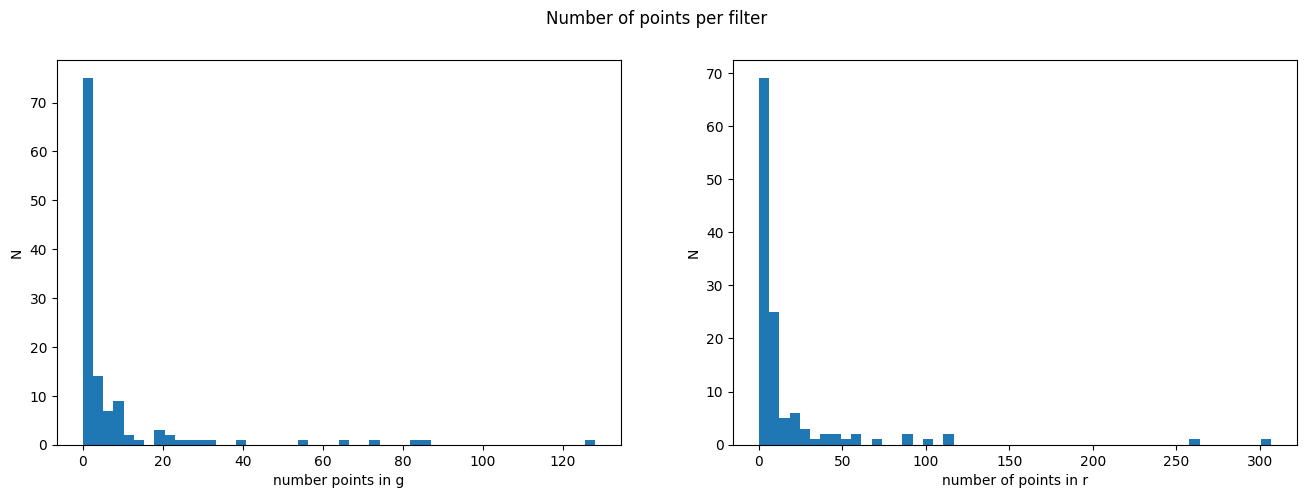

In [51]:
plt.figure(figsize=(16,5))
plt.suptitle('Number of points per filter')

plt.subplot(1,2,1)
plt.hist(data_use['n_g'], bins=50)
plt.xlabel('number points in g')
plt.ylabel('N')

plt.subplot(1,2,2)
plt.hist(data_use['n_r'], bins=50)
plt.xlabel('number of points in r')
plt.ylabel('N')

plt.show()

In [85]:
## population in Fink class inclui xmatches as well as machine learning -- 
# anything that does not have "candidate" in the name is probably xmatch with some catalog, most likely simbad
classes = np.unique(data['finkclass'].values)

data_use2 = deepcopy(data_use)
data_use2['top_class'] = [np.unique(data_use['finkclass'].values[i]) for i in range(data_use.shape[0])]

# average position
data_use2['mean_ra'] = [np.mean(data_use.iloc[i]['ra']) for i in range(data_use.shape[0])]
data_use2['mean_dec'] = [np.mean(data_use.iloc[i]['dec']) for i in range(data_use.shape[0])]

data_use2[['objectId', 'mean_ra', 'mean_dec']].to_csv('extragalactic_find_DR_photometry.csv', index=False)

## Check Machine learning classifications for Unknown

In [78]:
# separate objects without controversial classification
flag_unique_class = np.array([len(data_use2['top_class'].values[i]) == 1 for i in range(data_use2.shape[0])])
data_clean = data_use2[flag_unique_class]
print('Numbe of objects with straight-forward classification:', data_clean.shape[0])

# get unique values and frequencies
label_clean, freq_clean = np.unique(data_clean['top_class'].values, return_counts=True)

# get order
order_clean = np.argsort(freq_clean)
for i in range(-order_clean.shape[0], 0):
    print(label_clean[order_clean[i]], freq_clean[order_clean[i]])


Numbe of objects with straight-forward classification: 53
['AGN'] 1
['Cepheid'] 1
['GinPair'] 1
['GinGroup'] 1
['Unknown'] 1
['V*'] 1
['Seyfert_2'] 1
['Cl*'] 2
['BlueSG*'] 2
['RRLyr'] 5
['Star'] 5
['QSO'] 8
['GlCl'] 24


Check objects with multiple classifications

In [81]:
data_misc = data_use2[~flag_unique_class]
print('Numner of objects associated to multiple classes: ', data_misc.shape[0])

Numner of objects associated to multiple classes:  71


In [87]:
data_misc['top_class'].values

array([array(['BLLac', 'Unknown'], dtype='<U7'),
       array(['GlCl', 'GlobCluster'], dtype='<U11'),
       array(['EB*', 'EclBin', 'Unknown'], dtype='<U7'),
       array(['Candidate_RSG*', 'Cl*', 'Pec*', 'RSG*_Candidate', 'RedSG',
              'RedSG*', 'Star', 'Unknown'], dtype='<U14')                ,
       array(['GinCl', 'GlCl', 'RRLyr', 'RRLyrae', 'Unknown'], dtype='<U7'),
       array(['Cl*', 'Cluster*'], dtype='<U8'),
       array(['Cepheid', 'Type2Cep'], dtype='<U8'),
       array(['BSG*_Candidate', 'GlCl', 'UV', 'Unknown'], dtype='<U14'),
       array(['RRLyr', 'RRLyrae'], dtype='<U7'),
       array(['PN?_Candidate', 'QSO', 'Unknown', 'XB'], dtype='<U13'),
       array(['GlCl', 'HII', 'X'], dtype='<U4'),
       array(['GinCl', 'QSO', 'X'], dtype='<U5'),
       array(['QSO', 'Unknown'], dtype='<U7'),
       array(['GlCl', 'PulsV*', 'Unknown'], dtype='<U7'),
       array(['GlCl', 'Star'], dtype='<U4'),
       array(['GlCl', 'Unknown'], dtype='<U7'),
       array(['GlCl', 'LP